In [1]:
from ultralytics import YOLO
from ultralytics.solutions import object_counter

import cv2

In [2]:
model = YOLO('yolov8n.pt')
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [3]:
video = './videos/trafficCam.mp4'

In [5]:
def dibuja_punto_centro(source,caja, color=(0,255,255)):
    x, y, w, h = caja.xywh[0]
       
    cv2.circle(source, (int(x), int(y)), 1, color, 5)
    

In [4]:
inicio_linea_A = (50, 480)
fin_linea_A = (470, 480)
inicio_linea_B = (525, 480)
fin_linea_B = (730, 480)
inicio_linea_C = (850, 480)
fin_linea_C = (1190, 480)

contador_A = 0
contador_B = 0
contador_C = 0


temporal = None

#https://app.codecov.io/github/ultralytics/ultralytics/pull/7152/blob/ultralytics/solutions/object_counter.py


In [6]:
rectanguloA = [(50, 340), (480, 340), (480,400), (50,400)]

In [8]:
captura = cv2.VideoCapture(video)

obj_contador_A = object_counter.ObjectCounter()
obj_contador_A.set_args(view_img=False,region_thickness=1, line_dist_thresh=2,
                 #reg_pts=[inicio_linea_A, fin_linea_A],
                 reg_pts=rectanguloA,
                 classes_names=model.names,line_thickness=1,
                 draw_tracks=True)

# obj_contador_B = object_counter.ObjectCounter()
# obj_contador_B.set_args(view_img=False,view_in_counts = False, view_out_counts = False,
#                  reg_pts=[inicio_linea_B, fin_linea_B],
#                  classes_names=model.names,
#                  draw_tracks=False)

# obj_contador_C = object_counter.ObjectCounter()
# obj_contador_C.set_args(view_img=False,view_in_counts = False, view_out_counts = False,
#                  reg_pts=[inicio_linea_C, fin_linea_C],
#                  classes_names=model.names,
#                  draw_tracks=False)

while True:
    ret, frame = captura.read()
    if not ret:
        break
    resultado = model.track(frame, persist=True,show=False)
    

    obj_contador_A.start_counting(frame,resultado)
    contador_A = obj_contador_A.in_counts
    # obj_contador_B.start_counting(frame,resultado)
    # contador_B = obj_contador_B.in_counts
    # obj_contador_C.start_counting(frame,resultado)
    # contador_C = obj_contador_C.in_counts
    
    
    # Dibujar las lineas de conteo
    # cv2.line(frame, inicio_linea_A, fin_linea_A, (0, 255, 0), 4)
    # cv2.line(frame, inicio_linea_B, fin_linea_B, (255, 255, 0), 4)
    # cv2.line(frame, inicio_linea_C, fin_linea_C, (0, 0, 255), 4)
    # Dibuja el contador de Vehiculos
    #cv2.putText(frame, f"{contador_A}", (inicio_linea_A[0]+6, inicio_linea_A[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)
    # cv2.putText(frame, f"{contador_B}", (inicio_linea_B[0]+6, inicio_linea_B[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 0), 2)
    # cv2.putText(frame, f"{contador_C}", (inicio_linea_C[0]+6, inicio_linea_C[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)
    
    
    cv2.imshow('Video', resultado[0].plot(line_width=1))
    if cv2.waitKey(1) == 27:
        temporal = resultado
        break

captura.release()
cv2.destroyAllWindows()



Region Counter Initiated.

0: 384x640 1 car, 1 bus, 14.0ms
Speed: 2.9ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 14.5ms
Speed: 6.4ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 10.6ms
Speed: 1.8ms preprocess, 1

In [30]:
class Objeto_Contar:
    def __init__(self, linea):
        self.cuenta = 0
        self.inicio_linea = linea[0]
        self.fin_linea = linea[1]
        self.__dicionario = {}
        
    def contar(self, tracker):
        for caja in tracker[0].boxes:
            id = int(caja.id)
            x, y = caja.xywh[0][0], caja.xywh[0][1]
            
            if x > self.inicio_linea[0] and x < self.fin_linea[0] and y > self.inicio_linea[1]:
                if id not in self.__dicionario:
                    self.__dicionario[id] = True
                    self.cuenta += 1
            

In [13]:
def contar_objetos_por_linea_horizontal(result_track,linea):  #punto_izquierda,punto_derecha
    for caja in result_track[0].boxes:
        id = caja.id
        x, y = caja.xywh[0][0], caja.xywh[0][1]
        
        if x > linea[0][0] and x < linea[1][0] and y > linea[0][1]:
            return int(id)

In [39]:
captura = cv2.VideoCapture(video)

obj_contador_A = Objeto_Contar(linea=(inicio_linea_A, fin_linea_A))
obj_contador_B = Objeto_Contar(linea=(inicio_linea_B, fin_linea_B))
obj_contador_C = Objeto_Contar(linea=(inicio_linea_C, fin_linea_C))

while True:
    ret, frame = captura.read()
    if not ret:
        break
    resultado = model.track(frame, persist=True,show=False)
    
    obj_contador_A.contar(resultado)
    obj_contador_B.contar(resultado)
    obj_contador_C.contar(resultado)
    
    
    # Dibujar las lineas de conteo
    cv2.line(frame, inicio_linea_A, fin_linea_A, (0, 255, 0), 1)
    cv2.line(frame, inicio_linea_B, fin_linea_B, (255, 255, 0), 1)
    cv2.line(frame, inicio_linea_C, fin_linea_C, (0, 0, 255), 1)
    # Dibuja el contador de Vehiculos
    cv2.putText(frame, f"{obj_contador_A.cuenta}", (inicio_linea_A[0]+6, inicio_linea_A[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"{obj_contador_B.cuenta}", (inicio_linea_B[0]+6, inicio_linea_B[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 0), 2)
    cv2.putText(frame, f"{obj_contador_C.cuenta}", (inicio_linea_C[0]+6, inicio_linea_C[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)
    
    
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) == 27:
        temporal = resultado
        break

captura.release()
cv2.destroyAllWindows()



0: 384x640 1 car, 42.7ms
Speed: 14.7ms preprocess, 42.7ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 21.1ms
Speed: 2.1ms preprocess, 21.1ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 12.8ms
Speed: 4.3ms preprocess, 12.8ms inference, 4.9ms postpro

1
1
0
1.0->307,114 No ha cruzado ninguna linea
32.0->635,604 Ya cruzo la linea B
35.0->620,284 No ha cruzado ninguna linea
37.0->96,583 Ya cruzo la linea A
38.0->548,142 No ha cruzado ninguna linea
39.0->352,207 No ha cruzado ninguna linea
40.0->486,67 No ha cruzado ninguna linea
41.0->437,130 No ha cruzado ninguna linea
42.0->441,194 No ha cruzado ninguna linea
43.0->372,121 No ha cruzado ninguna linea


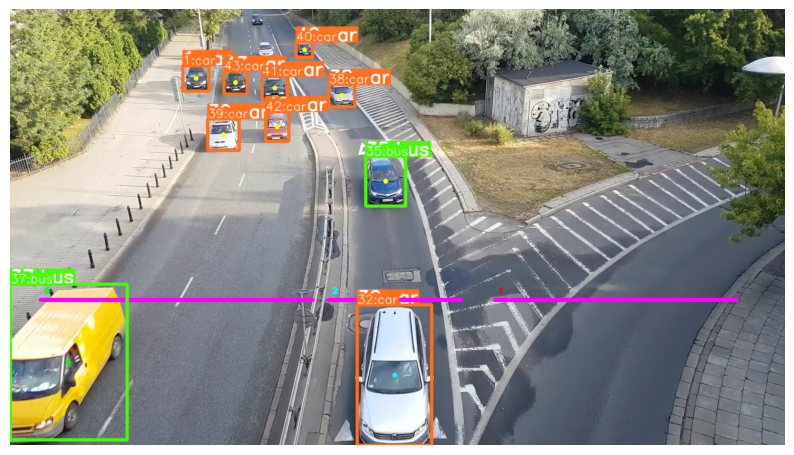

In [27]:
import matplotlib.pyplot as plt

contar_linea_A = Objeto_Contar(temporal, (inicio_linea_A,fin_linea_A))
contar_linea_B = Objeto_Contar(temporal, (inicio_linea_B,fin_linea_B))
contar_linea_C = Objeto_Contar(temporal, (inicio_linea_C,fin_linea_C))

contar_linea_A.contar()
contar_linea_B.contar()
contar_linea_C.contar()

print(contar_linea_A.cuenta)
print(contar_linea_B.cuenta)
print(contar_linea_C.cuenta)

for caja in temporal[0].boxes:
    id = caja.id
    x, y = caja.xywh[0][0], caja.xywh[0][1]
    
    
    
    
    if x > inicio_linea_A[0] and x < fin_linea_A[0] and y > inicio_linea_A[1]:
        dibuja_punto_centro(frame,caja, (0,255,0))
        print(f'{id[0]}->{int(x)},{int(y)} Ya cruzo la linea A')
    elif x > inicio_linea_B[0] and x < fin_linea_B[0] and y > inicio_linea_B[1]:
        dibuja_punto_centro(frame,caja, (255,255,0))
        print(f'{id[0]}->{int(x)},{int(y)} Ya cruzo la linea B')
    elif x > inicio_linea_C[0] and x < fin_linea_C[0] and y > inicio_linea_C[1]:
        dibuja_punto_centro(frame,caja, (0,0,255))
        print(f'{id[0]}->{int(x)},{int(y)} Ya cruzo la linea C')
    else:
        dibuja_punto_centro(frame,caja)
        print(f'{id[0]}->{int(x)},{int(y)} No ha cruzado ninguna linea')


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()